**BIENVENIDO(A)**

En este repositorio encontrarás diversos cuadernos de Jupyter donde desarrollo análisis prácticos aplicados a múltiples conjuntos de datos. He estructurado estos proyectos enfocándome no solo en el resultado final, sino en documentar exhaustivamente el proceso analítico.

Para facilitar la comprensión de mi razonamiento lógico en cada fase de exploración, he incluido comentarios detallados en el código. Esta práctica me permite mantener un registro claro de mis ideas y, simultáneamente, busca hacer el contenido completamente accesible para otros analistas, estudiantes o reclutadores que examinen mi trabajo.

Como Analista de Datos Junior en constante formación, reconozco el inmenso valor del trabajo colaborativo y la revisión por pares. Si al revisar mi código identificas áreas de mejora, mejores prácticas o tienes críticas constructivas, te invito cordialmente a compartirlas. Toda observación que contribuya a mi crecimiento profesional es sinceramente apreciada.

Dataframe Analizado: https://www.kaggle.com/datasets/swatibadola156/covid-19-global-statistics-february-2026

**INSTALACIÓN DE PAQUETES REQUERIDOS**

In [23]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


**IMPORTACIÓN DE LIBRERÍAS**

In [24]:
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

**RUTA DEL ARCHIVO CSV**

In [ ]:
# local_file_path = ''
online_file_path = kagglehub.dataset_download("swatibadola156/covid-19-global-statistics-february-2026")

**CARGA DEL DATAFRAME**

In [26]:
# df = pd.read_csv(local_file_path)
df = pd.read_csv(f"{online_file_path}/covid19_global_statistics_2026.csv")

**CONFIGURACIÓN DE VISUALIZACIÓN**

In [27]:
pd.set_option('display.max_columns', 13)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', None)

**EXPLORACIÓN INICIAL DEL DATAFRAME**

In [28]:
print('\ndf.columns: Columnas Del DataFrame.\n')
print(list(df.columns),'\n')

print('df.head(): Primeras 5 Filas Del DataFrame.\n') 
print(df.head(),'\n')                                         

print('df.tail(): Últimas 5 Filas Del DataFrame.\n')
print(df.tail(),'\n')                                        

print('df.sample(): 5 Filas Aleatorias Del DataFrame.\n')
print(df.sample(5),'\n')                                                                                       

print('df.shape: Dimensión Del DataFrame (Filas, Columnas).\n')
print(df.shape,'\n')

print('df.info(): Información General Del DataFrame.\n')
df.info()


df.columns: Columnas Del DataFrame.

['continent', 'country', 'population', 'date', 'new_cases', 'active_cases', 'cases_per_million', 'total_cases', 'new_deaths', 'deaths_per_million', 'total_deaths', 'tests_per_million', 'total_tests'] 

df.head(): Primeras 5 Filas Del DataFrame.

       continent           country  population        date  new_cases  active_cases  cases_per_million  total_cases  new_deaths  deaths_per_million  total_deaths  tests_per_million  total_tests
0         Africa           Eritrea   3662244.0  2026-02-16        NaN           0.0             2782.0        10189         NaN                28.0         103.0             6470.0      23693.0
1         Africa             Niger  26083660.0  2026-02-16        NaN         729.0              381.0         9931         NaN                12.0         312.0             9759.0     254538.0
2         Africa      Saint-Helena      6115.0  2026-02-16        NaN        2164.0           354211.0         2166         NaN       

**LIMPIEZA DE DATOS - DETECCIÓN DE VALORES FALTANTES**

In [29]:
# VALORES FALTANTES POR COLUMNA

print('\nValores Faltantes Por Columna.\n')
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0],'\n')

# PORCENTAJE DE VALORES FALTANTES POR COLUMNA

print('Porcentaje De Valores Faltantes Por Columna.\n')                                                                               
missing_percentage = (df.isnull().sum() / len(df)) * 100                                                            
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False),'\n')

# Sustitución de valores NaN con "Sin Información" en las columnas 'population', 'new_cases', 'active_cases', 'cases_per_million', 'new_deaths', 'deaths_per_million', 'total_deaths', 'test_per_million', 'total_tests'.

for col in ['population', 'new_cases', 'active_cases', 'cases_per_million', 'new_deaths', 'deaths_per_million', 'total_deaths', 'tests_per_million', 'total_tests']:
    df[col] = df[col].fillna("Sin Información")


Valores Faltantes Por Columna.

continent               2
population              9
new_cases             221
active_cases           47
cases_per_million       8
new_deaths            235
deaths_per_million     13
total_deaths            5
tests_per_million      25
total_tests            25
dtype: int64 

Porcentaje De Valores Faltantes Por Columna.

new_deaths            98.739496
new_cases             92.857143
active_cases          19.747899
tests_per_million     10.504202
total_tests           10.504202
deaths_per_million     5.462185
population             3.781513
cases_per_million      3.361345
total_deaths           2.100840
continent              0.840336
dtype: float64 



**LIMPIEZA DE DATOS - GESTIÓN DE DATOS BASURA**

In [30]:
# Eliminar filas que incluyen valores relacionados con cruceros Fila 5 (Diamond-Princess) y 8 (MS Zaandam).

df = df.drop([5, 8])

# Eliminar filas en que 'continent' == 'country'.

df = df.drop(df[(df['continent'] == df['country'])].index)

# Corregir índice 112 ('country' = 'R&eacute;union') -> 'Reunión'.

df.loc[112, 'country'] = 'Reunión'

# Eliminar columnas con exceso de valores NaN.

df.drop(columns=['new_cases', 'new_deaths'], inplace=True)

# Columnas del Dataframe actualizadas.

print('\ndf.columns: Columnas Del DataFrame Actualizadas.\n')
print(list(df.columns),'\n')

# Resetear el index del DataFrame.

df = df.reset_index(drop=True)


df.columns: Columnas Del DataFrame Actualizadas.

['continent', 'country', 'population', 'date', 'active_cases', 'cases_per_million', 'total_cases', 'deaths_per_million', 'total_deaths', 'tests_per_million', 'total_tests'] 



**LIMPIEZA DE DATOS - GESTIÓN DE VALORES DUPLICADOS**

In [31]:
# NÚMERO DE FILAS DUPLICADAS

num_duplicates = df.duplicated().sum()

print('\nNúmero De Filas Duplicadas\n')                                                                                                                
print(f"Filas Duplicadas Encontradas: {num_duplicates}\n")


Número De Filas Duplicadas

Filas Duplicadas Encontradas: 0



**LIMPIEZA DE DATOS - CORRECCIÓN DE TIPOS DE DATOS**

In [32]:
# TIPOS DE DATOS ORIGINALES

print('\nTipos De Datos Originales:\n')
print(df.dtypes,'\n')

df['population'] = pd.to_numeric(df['population'], errors='coerce')

for col in ['active_cases', 'cases_per_million', 'total_cases', 'deaths_per_million', 'total_deaths', 'tests_per_million', 'total_tests']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# TIPOS DE DATOS CORREGIDOS

print("Tipos De Datos Corregidos:\n")
print(df.dtypes,'\n')


Tipos De Datos Originales:

continent                str
country                  str
population            object
date                     str
active_cases          object
cases_per_million     object
total_cases            int64
deaths_per_million    object
total_deaths          object
tests_per_million     object
total_tests           object
dtype: object 

Tipos De Datos Corregidos:

continent                 str
country                   str
population            float64
date                      str
active_cases          float64
cases_per_million     float64
total_cases             int64
deaths_per_million    float64
total_deaths          float64
tests_per_million     float64
total_tests           float64
dtype: object 



**MANIPULACIÓN DE DATOS: CREACIÓN DE COLUMNA TASA DE MORTALIDAD**

In [33]:
df['mortality_rate'] = (df['total_deaths'] / df['total_cases']) * 100

**MANIPULACIÓN DE DATOS: CREACIÓN DE COLUMNA TASA DE POSITIVIDAD**

In [34]:
df['positivity_rate'] = (df['total_cases'] / df['total_tests']) * 100

# Columnas del Dataframe actualizadas.

print('\ndf.columns: Columnas Del DataFrame Actualizadas.\n')
print(list(df.columns),'\n')


df.columns: Columnas Del DataFrame Actualizadas.

['continent', 'country', 'population', 'date', 'active_cases', 'cases_per_million', 'total_cases', 'deaths_per_million', 'total_deaths', 'tests_per_million', 'total_tests', 'mortality_rate', 'positivity_rate'] 



**MANIPULACIÓN DE DATOS: AGRUPAR DATOS POR CONTINENTE Y CALCULAR LA SUMA DE 'total_cases' Y 'total_deaths'. ADEMÁS DEL PROMEDIO DE 'mortality_rate'**

In [35]:
continent_data = df.groupby('continent').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum',
    'mortality_rate': 'mean'
}).reset_index()

print(f"\n{continent_data}")


       continent  total_cases  total_deaths  mortality_rate
0         Africa     12860924      258892.0        1.938793
1           Asia    221500265     1553662.0        1.359778
2         Europe    253406198     2101824.0        0.934478
3  North-America    131889132     1695941.0        1.078474
4        Oceania     14895771       33015.0        0.376375
5  South-America     70200879     1367332.0        1.902053


**ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

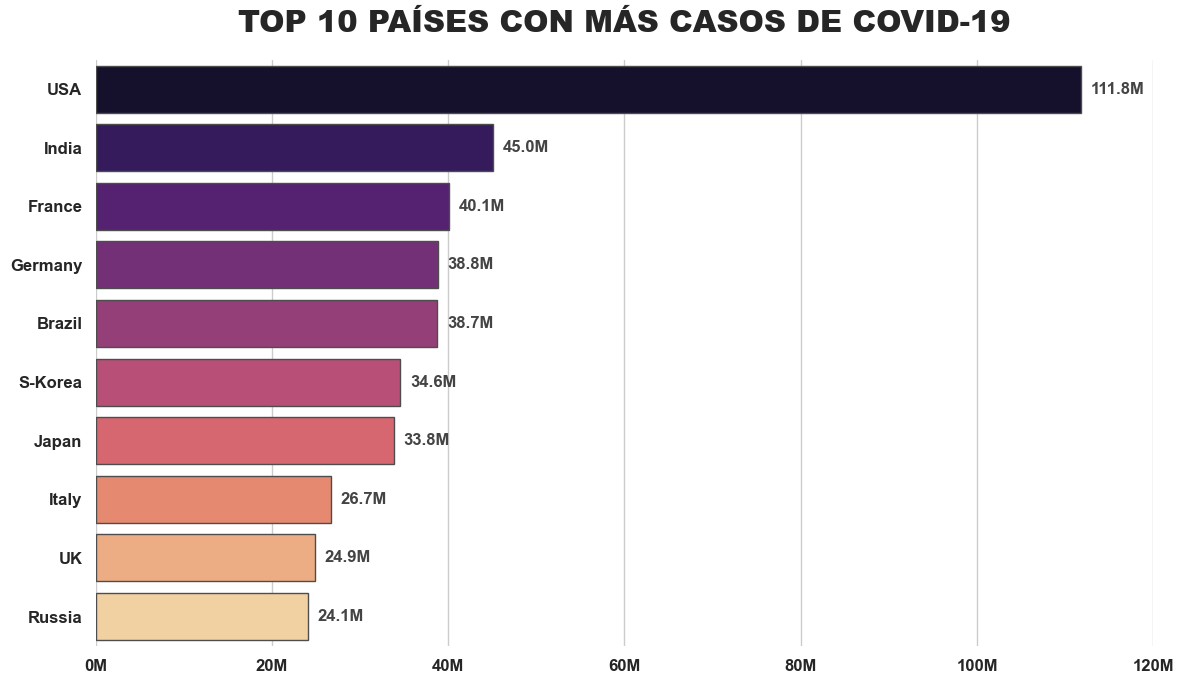

In [36]:
# PREGUNTA 1: Genera un gráfico de barras mostrando los 10 países con más total_cases.

# FILTRADO

top_cases = df.sort_values(by='total_cases', ascending=False).head(10)

# GRÁFICO

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x='total_cases', 
    y='country', 
    data=top_cases, 
    palette="magma",
    hue='country',  
    edgecolor='0.3',
    legend=False    
)

max_val = top_cases['total_cases'].max()

ticks_pos = np.arange(0, max_val + 20e6, 20e6)

ax.set_xticks(ticks_pos)

ax.set_xticklabels(
    [f'{int(t/1e6)}M' for t in ticks_pos],
    fontsize=12,
    fontweight='bold'
)

ax.set_yticks(
    range(len(top_cases))
) 

ax.set_yticklabels(
    top_cases['country'],
    fontsize=12,
    fontweight='bold'
)

for i, v in enumerate(top_cases['total_cases']):
    ax.text(
        v + (max_val * 0.01), 
        i, f'{v/1e6:.1f}M', 
        va='center',
        fontsize=12, 
        fontweight='bold',
        color='#444444'
    )

plt.title(
    'TOP 10 PAÍSES CON MÁS CASOS DE COVID-19', 
    fontsize=22, 
    fontweight='heavy', 
    pad=20
)

plt.xlabel('')
plt.ylabel('') 

sns.despine(
    left=True, 
    bottom=True
)

plt.tight_layout()
print('\n')
plt.show()
print('\n')

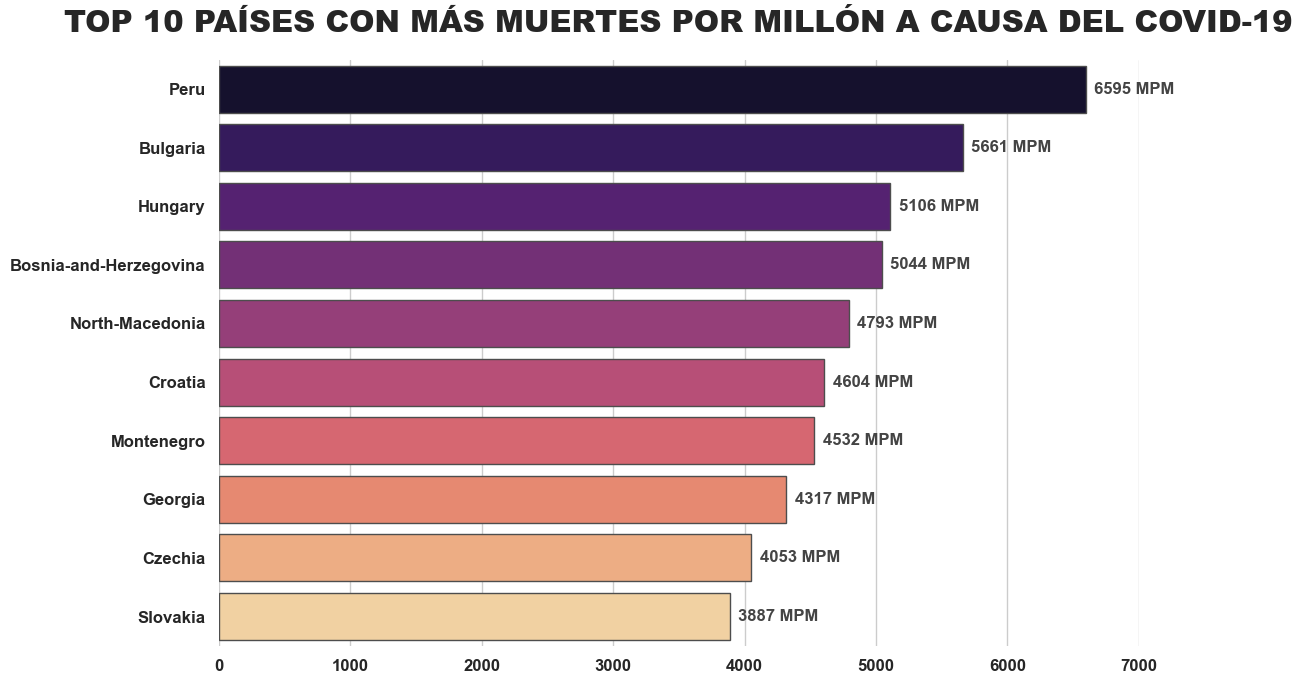

In [37]:
# PREGUNTA 2: Genera otro gráfico mostrando los 10 países con mayor deaths_per_million. (Esto suele mostrar una realidad diferente a los números absolutos).

# FILTRADO

top_deaths = df.sort_values(by='deaths_per_million', ascending=False).head(10)

# GRÁFICO

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x='deaths_per_million', 
    y='country', 
    data=top_deaths, 
    palette="magma",
    hue='country',  
    edgecolor='0.3',
    legend=False    
)

max_val = top_deaths['deaths_per_million'].max()

ticks_pos = np.arange(0, max_val + 1000, 1000)

ax.set_xticks(ticks_pos)

ax.set_xticklabels(
    [f'{int(t)}' for t in ticks_pos],
    fontsize=12,
    fontweight='bold'
)

ax.set_yticks(
    range(len(top_deaths))
) 

ax.set_yticklabels(
    top_deaths['country'],
    fontsize=12,
    fontweight='bold'
)

for i, v in enumerate(top_deaths['deaths_per_million']):
    ax.text(
        v + (max_val * 0.01), 
        i,
        f'{v:.0f} MPM', 
        va='center', 
        fontsize=12, 
        fontweight='bold', 
        color='#444444'
    )

plt.title(
    'TOP 10 PAÍSES CON MÁS MUERTES POR MILLÓN A CAUSA DEL COVID-19',
    fontsize=22,
    fontweight='heavy',
    pad=20
)

plt.xlabel('') 
plt.ylabel('') 

sns.despine(
    left=True, 
    bottom=True
)

plt.tight_layout()
print('\n')
plt.show()
print('\n')

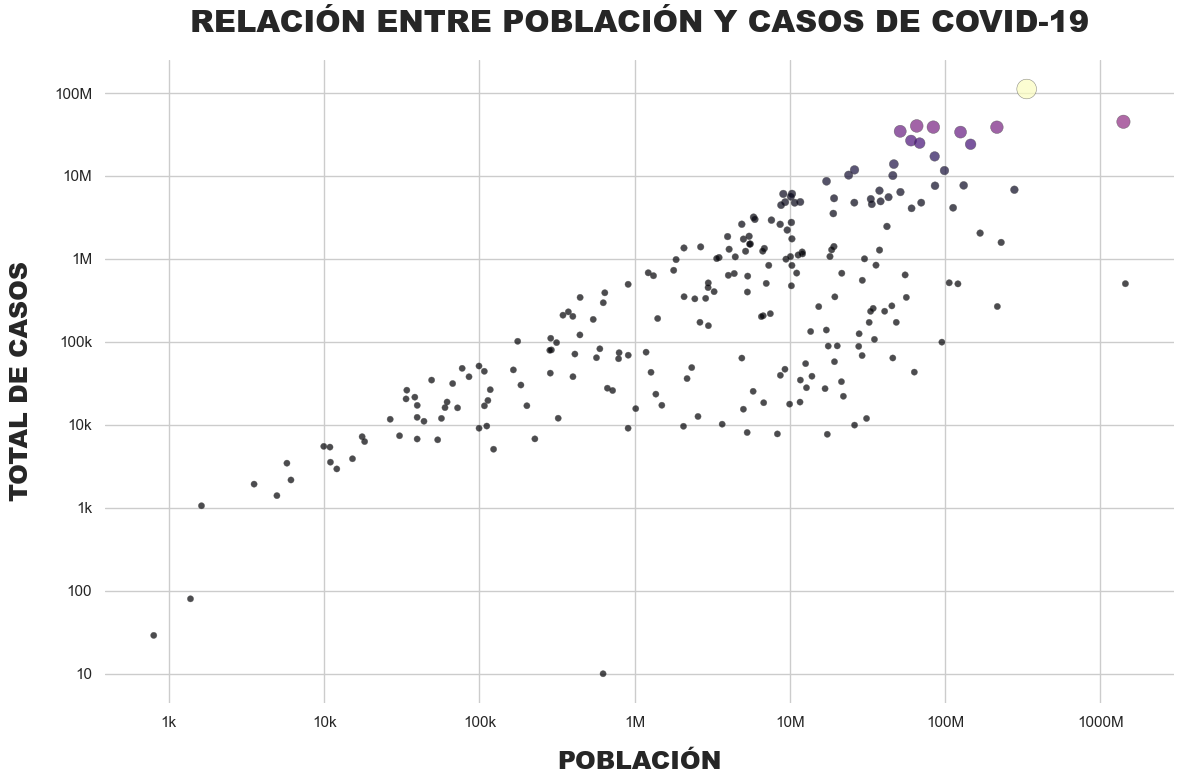

In [38]:
# PREGUNTA 3: Genera un Scatter Plot (gráfico de dispersión): Eje X = population, Eje Y = total_cases.

# GRÁFICO

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

ax = sns.scatterplot(
    x='population', 
    y='total_cases', 
    data=df, 
    palette="magma",
    hue='total_cases',
    size='total_cases',
    sizes=(20, 200),
    edgecolor='0.3',
    alpha=0.7,
    legend=False    
)

ax.set_xscale('log')
ax.set_yscale('log')

def millones_formatter(x, pos):
    if x >= 1e6:
        return f'{x*1e-6:g}M'
    elif x >= 1e3:
        return f'{x*1e-3:g}k'
    else:
        return f'{x:g}'

formatter = FuncFormatter(millones_formatter)
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

ax.set_title(
    'RELACIÓN ENTRE POBLACIÓN Y CASOS DE COVID-19', 
    fontsize=22,
    fontweight='heavy',
    pad=20
)

ax.set_xlabel(
    'POBLACIÓN',
    fontsize=18,
    labelpad=15,
    fontweight='heavy'
)
ax.set_ylabel(
    'TOTAL DE CASOS',
    fontsize=18,
    labelpad=15,
    fontweight='heavy'
) 

sns.despine(
    left=True,
    bottom=True
)

plt.tight_layout()
print('\n')
plt.show()
print('\n')

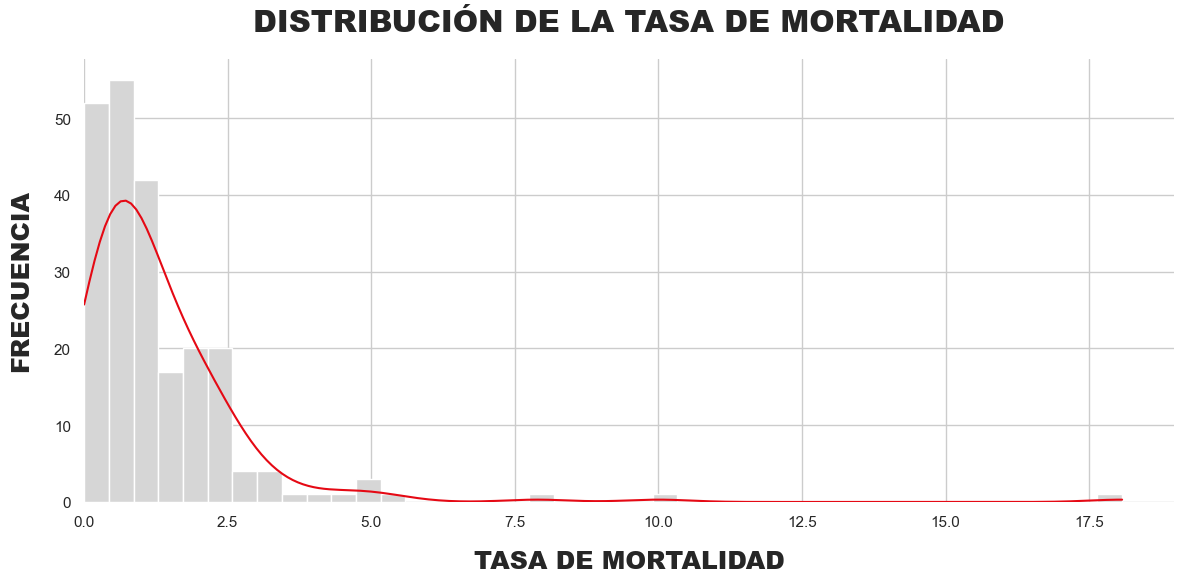

In [39]:
# PREGUNTA 4: Crea un Histograma de la columna mortality_rate. ¿Sigue una distribución normal o está sesgada?

# GRÁFICO

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.histplot(
    df['mortality_rate'],
    kde=True,
    color='#D6D6D6', 
    edgecolor='white', 
    alpha=1
)

ax.lines[0].set_color('#E50914')
ax.lines[0].set_linewidth(1.5)
ax.set_xlim(left=0)

plt.title(
    'DISTRIBUCIÓN DE LA TASA DE MORTALIDAD',
    fontsize=22,
    fontweight='heavy',
    pad=20
)

plt.xlabel(
    'TASA DE MORTALIDAD',
    fontsize=18,
    labelpad=15,
    fontweight='heavy'
)

plt.ylabel(
    'FRECUENCIA',
    fontsize=18,
    labelpad=15,
    fontweight='heavy'
)

sns.despine(
    left=True,
    bottom=True
)

plt.tight_layout()
print('\n')
plt.show()
print('\n')

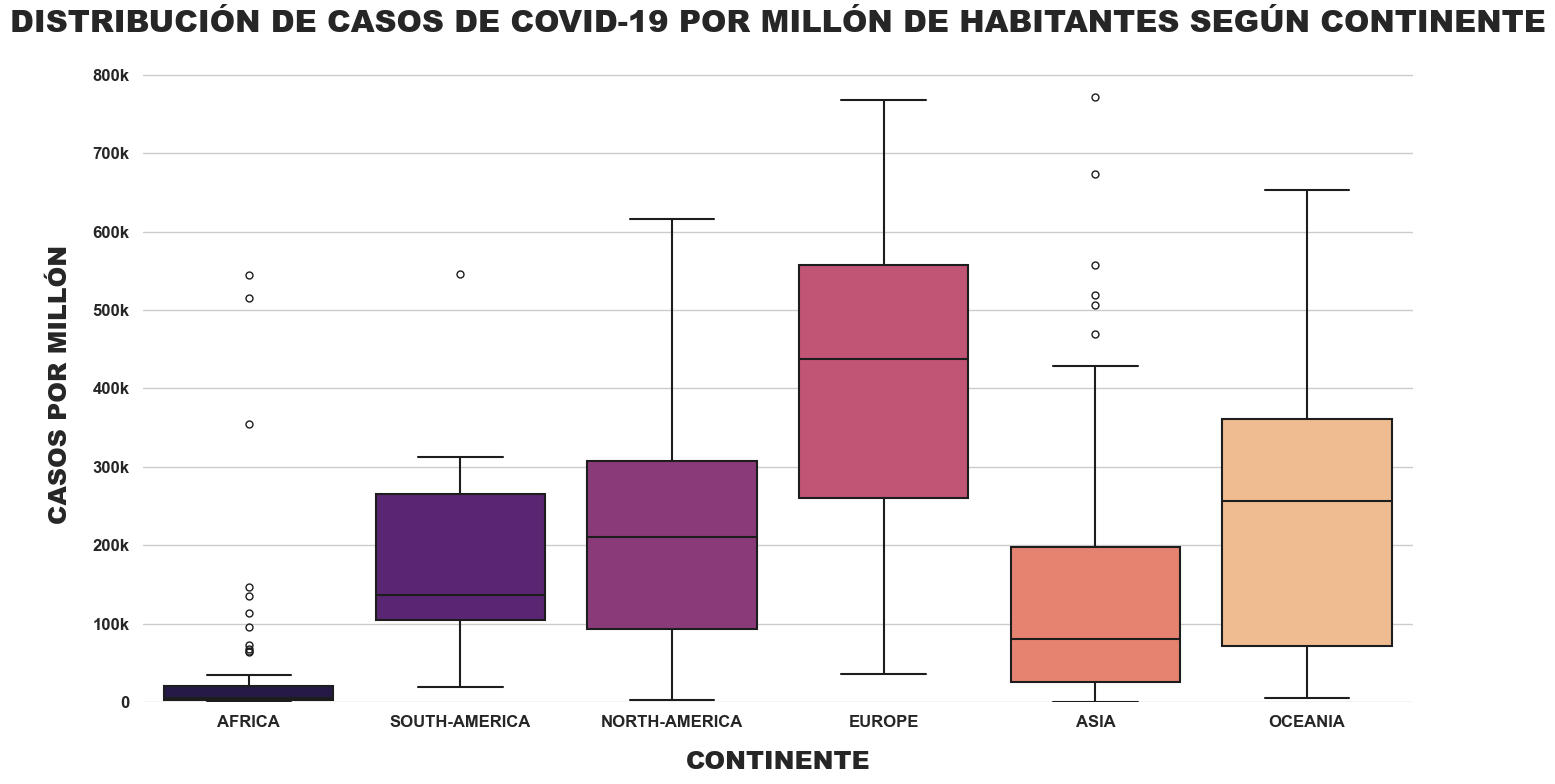

In [40]:
# PREGUNTA 5: Crea un Boxplot de cases_per_million dividido por continent. Esto te permitirá ver outliers (países con casos inusualmente altos dentro de su región).

# GRÁFICO

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

ax = sns.boxplot(
    x=df['continent'].str.upper(), 
    y='cases_per_million', 
    data=df, 
    palette="magma",
    hue='continent',      
    linewidth=1.5,
    fliersize=5,           
    legend=False          
)

def miles_formatter(x, pos):
    return f'{int(x/1000)}k' if x != 0 else '0'

ax.yaxis.set_major_formatter(FuncFormatter(miles_formatter))

plt.title(
    'DISTRIBUCIÓN DE CASOS DE COVID-19 POR MILLÓN DE HABITANTES SEGÚN CONTINENTE',
    fontsize=22,
    fontweight='heavy',
    pad=25
)

plt.xlabel(
    'CONTINENTE',
    fontsize=18,
    labelpad=15,
    fontweight='heavy'
)

plt.xticks(
    fontsize=12,
    fontweight='bold'
)

plt.yticks(
    fontsize=12,
    fontweight='bold'
)

plt.ylabel(
    'CASOS POR MILLÓN',
    fontsize=18,
    labelpad=15,
    fontweight='heavy'
)

ax.set_ylim(bottom=0)

sns.despine(
    left=True,
    bottom=True
)

plt.tight_layout()
print('\n')
plt.show()
print('\n')

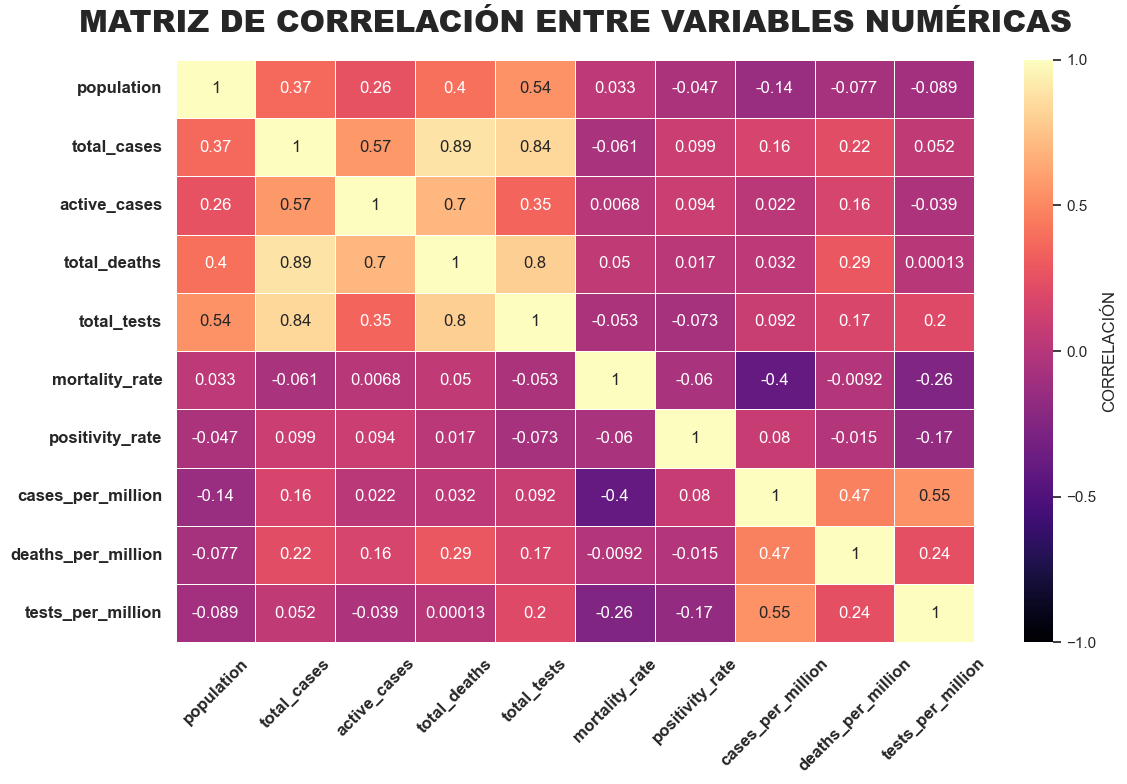

In [41]:
# PREGUNTA 6: Calcula la matriz de correlación entre todas las variables numéricas. Visualízala con un Heatmap de Seaborn. Pregunta a resolver: ¿Qué variable tiene mayor correlación con total_deaths: total_cases, population o active_cases?

# FILTRADO

columnas_interes = ['population', 'total_cases', 'active_cases', 'total_deaths', 'total_tests', 'mortality_rate', 'positivity_rate', 'cases_per_million', 'deaths_per_million', 'tests_per_million']

# MATRIZ DE CORRELACIÓN

corr_matrix = df[columnas_interes].corr()

# GRÁFICO

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

ax = sns.heatmap(
    corr_matrix,
    cmap='magma',
    annot=True, 
    linewidths=0.5, 
    cbar_kws={'ticks': [-1, -0.5, 0, 0.5, 1], 'label': 'CORRELACIÓN'},
    vmin=-1, vmax=1
)

ax.set_title(
    'MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS',
    fontsize=22,
    fontweight='heavy',
    pad=20
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=12,
    fontweight='bold',
    rotation=45
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=12,
    fontweight='bold'
)

sns.despine(
    left=True,
    bottom=True
)

plt.tight_layout()
print('\n')
plt.show()
print('\n')

In [42]:
# PREGUNTA 7: Detección de Anomalías: Filtra los países que tengan una mortality_rate superior al percentil 95 (el top 5% más letal). ¿Qué tienen en común esos países?

percentil_95 = df['mortality_rate'].quantile(0.95)
anomalos = df[df['mortality_rate'] > percentil_95]

print('\nDetección De Anomalías:\n')
print(f"{anomalos}\n")


Detección De Anomalías:

         continent                 country   population        date  active_cases  cases_per_million  total_cases  deaths_per_million  total_deaths  tests_per_million  total_tests  mortality_rate  positivity_rate
6           Africa          Western-Sahara     626161.0  2026-02-16           0.0               16.0           10                 2.0           1.0                NaN          NaN       10.000000              NaN
8           Africa                 Liberia    5305117.0  2026-02-16          12.0             1525.0         8090                56.0         295.0            26356.0     139824.0        3.646477         5.785845
39          Africa                 Somalia   16841795.0  2026-02-16       12791.0             1623.0        27334                81.0        1361.0            23778.0     400466.0        4.979147         6.825548
66            Asia                   Yemen   31154867.0  2026-02-16         662.0              383.0        11945         

In [43]:
# PREGUNTA 8: Comparativa de Testing: Compara países con alta tasa de testeo (tests_per_million) vs. baja tasa de testeo. ¿Afecta esto a la tasa de mortalidad reportada?

percentil_75_tests = df['tests_per_million'].quantile(0.75)
percentil_25_tests = df['tests_per_million'].quantile(0.25)

print(f"\nPromedio de Mortalidad en Países con Alta Tasa de Testeo: {df[df['tests_per_million'] > percentil_75_tests]['mortality_rate'].mean():.2f}")
print(f"\nPromedio de Mortalidad en Países con Baja Tasa de Testeo: {df[df['tests_per_million'] < percentil_25_tests]['mortality_rate'].mean():.2f}")


Promedio de Mortalidad en Países con Alta Tasa de Testeo: 0.48

Promedio de Mortalidad en Países con Baja Tasa de Testeo: 2.32


In [44]:
# PREGUNTA 9: Comparativa de Mortalidad: Compara países con alta mortalidad (mortality_rate) vs. baja mortalidad. ¿Afecta esto a la tasa de testeo reportada?

percentil_75_mortality = df['mortality_rate'].quantile(0.75)
percentil_25_mortality = df['mortality_rate'].quantile(0.25)

print(f"\nPromedio de Testeo en Países con Alta Mortalidad: {df[df['mortality_rate'] > percentil_75_mortality]['tests_per_million'].mean():.2f}")
print(f"\nPromedio de Testeo en Países con Baja Mortalidad: {df[df['mortality_rate'] < percentil_25_mortality]['tests_per_million'].mean():.2f}")


Promedio de Testeo en Países con Alta Mortalidad: 376906.09

Promedio de Testeo en Países con Baja Mortalidad: 4012785.17
